# Session Outline

Go through the rest of session 8:

- Word Sense Disambiguation 
- Named Entity Recognition
- Entity Linking

New Stuff:

- Word-embeddings and Vector Space
- Cosine Similarity

Homework:
- Session 8 excercises + Session 9 excercises = Homework today


In [1]:
import codecs, nltk, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:


exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string - we need a simple pipeline for getting word embeddings
def nlp_simple_pipeline(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    
    text = nltk.word_tokenize(text)
        
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    text = [token for token in text if token not in stop_word_list]

    return text

### How do we know if words are related?

Similarity: two words sharing a high number of salient (e.g., synonyms)
Relatedness: two words semantically associated, without being necessarily similar (car and pilot)

### Why do we need embeddings?

- To capture the meaning of a word in the vector-space
- words with similar context occupy close spatial positions

## Vector Space Model

The most basic and naive method for transforming words into vectors is to count occurrence of each word in each document - **countvectorizing or one-hot encoding **


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# create CountVectorizer object
vectorizer = CountVectorizer()
corpus = [
          'Text of first document.',
          'Text of the second document made longer.',
          'Number three.',
          'This is number four.',
]

# learn the vocabulary and store CountVectorizer sparse matrix in X
X = vectorizer.fit_transform(corpus)

# columns of X correspond to the result of this method
vectorizer.get_feature_names() == (
    ['document', 'first', 'four', 'is', 'longer',
     'made', 'number', 'of', 'second', 'text',
     'the', 'this', 'three'])
# retrieving the matrix in the numpy form
X.toarray()


# transforming a new document according to learn vocabulary
#vectorizer.transform(['A new document.']).toarray()


array([[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]], dtype=int64)

- The idea is to collect a set of documents (they can be words, sentences, paragraphs or even articles) and count the occurrence of every word in them. 
- Strictly speaking, the columns of the resulting matrix are words and the rows are documents.

**This is a however sparse vector** - has mostly zero values

In [4]:
X = vectorizer.fit_transform(corpus)
X#make list of aall sentenced 

<4x13 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [5]:
vectorizer.get_feature_names()

['document',
 'first',
 'four',
 'is',
 'longer',
 'made',
 'number',
 'of',
 'second',
 'text',
 'the',
 'this',
 'three']

In [6]:
X

<4x13 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [7]:
X.toarray()

array([[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]], dtype=int64)

# Wordembeddings

- Lower dimension dense vectors

Word2vec - Train the neural network for two different tasks:
- Predicting the word, given the context
- Classification of a word, given another word in the sentence

## You can train your own embeddings: for example on political text, manifestos etc.

## Lets see how we can use them!

In [11]:
import gensim
# the model is organized like this: word = embeddings
small_model = gensim.models.KeyedVectors.load_word2vec_format('/Users/Ashrakat/Desktop/small-embeddings.txt', binary=False)

In [12]:
#to see the embeddings of a word, you just do:

print (small_model["clinton"])
print (small_model["obama"])

[ 0.23158   0.69964   0.43878  -0.31633   0.18509   0.45519  -0.52914
  0.13019  -0.6016   -0.53644  -1.8771   -0.32314  -0.13149   0.05427
  0.24486  -0.037868 -0.34769  -0.60215   0.72329  -0.47918   0.15473
  0.4589    0.37807  -1.0418    0.43743  -2.6996    0.2478    0.68145
 -0.23022  -0.024437  2.133     0.46905  -1.1284   -1.0115   -0.3608
 -0.89718  -0.47746   0.46726  -0.88369  -0.99028  -0.69334   0.55325
 -0.44621  -0.1735   -0.070923  0.04234  -0.68205   0.68464  -0.43253
  0.75606 ]
[ 0.088383  0.64673   1.1358   -0.41847   0.24472   0.23206  -0.70671
 -0.10504  -0.31253  -0.40369  -1.9403   -0.51725   0.068855  0.2083
 -0.093209  0.031652 -0.46409  -0.44976   0.62411  -0.30082   0.048925
  0.066813  0.40686  -0.99385   0.87213  -2.5763    0.18983   0.5685
 -0.28695  -0.032524  1.9832    0.7982   -1.0181   -0.845    -0.46184
 -1.0593   -0.57683   0.55183  -1.3238   -1.1482   -0.71687   0.36369
 -0.68577  -0.45659   0.26248   0.17701  -0.53864   0.61634  -0.029942
  0.78279

In [13]:
small_model.wv.most_similar(positive=['obama'])


[('barack', 0.9674171805381775),
 ('bush', 0.9642481207847595),
 ('clinton', 0.9606046080589294),
 ('mccain', 0.912293553352356),
 ('dole', 0.8878743052482605),
 ('gore', 0.8848039507865906),
 ('hillary', 0.8776552081108093),
 ('rodham', 0.8401790857315063),
 ('kerry', 0.8261427879333496),
 ('biden', 0.8095825910568237)]

In [14]:
# get relatedness

print (small_model.wv.similarity('clinton', 'clinton'))
print (small_model.wv.similarity('clinton', 'obama'))

1.0000000000000004
0.9606045352860738


In [15]:

# you can represent the meaning of an article, by the average of their embeddings
# let's compute the embeddings for an article

dataset = codecs.open("/Users/Ashrakat/Desktop/rt_dataset.tsv", "r", "utf-8").read().strip().split("\n")

article = dataset[4].split("\t")[3]

cleaned_article = nlp_simple_pipeline(article)
print (cleaned_article)

['lisa', 'bardack', 'clinton', 'personal', 'doctor', 'since', 'released', 'statement', 'clinton', 'campaign', 'said', 'former', 'secretary', 'state', 'diagnosed', 'pneumonia', 'examination', 'regarding', 'prolonged', 'cough', 'lisa', 'bardack', 'clinton', 'doctor', 'says', 'democratic', 'nominee', 'pneumonia', 'full', 'statement', 'clinton', 'advised', 'rest', 'modify', 'schedule', 'put', 'antibiotics', 'friday', 'bardack', 'said', 'recovering', 'nicely', 'said', 'doctor', 'referring', 'earlier', 'explanation', 'overheating', 'dehydration', 'given', 'clinton', 'abrupt', 'departure', 'commemoration', 'event', 'media', 'expressed', 'suspicion', 'clinton', 'exit', 'event', 'accounts', 'stumbled', 'helped', 'car', 'video', 'footage', 'later', 'emerged', 'corroborating', 'secretary', 'clinton', 'attended', 'september', 'commemoration', 'ceremony', 'hour', 'minutes', 'morning', 'pay', 'respects', 'greet', 'families', 'fallen', 'campaign', 'spokesman', 'nick', 'merrill', 'said', 'ceremony', '

In [16]:
# for each word, load embeddings
for word in cleaned_article:
    print (word)
    embed_word = small_model[word]

lisa
bardack


KeyError: "word 'bardack' not in vocabulary"

In [17]:
# handling exceptions
for word in cleaned_article:
    try:
        embed_word = small_model[word]
    except KeyError:
        print (word)
        continue

bardack
bardack
bardack
cappaqua
hillaryclinton
видео
опубликовано
сен
hackinghillary
hillaryhealth
hillaryshealth
wapo
berniesanders
hillaryshealthhttps
hillaryshealth
hillaryhealth


## Representing the meaning of an article as a single embedding


In [24]:
small_model

In [21]:
import numpy as np

def article_embedding(cleaned_article):
    
    article_embedd = []
    # for each word in the article, you take the embeddings
    for word in cleaned_article:
        try:
            embed_word = small_model[word]
            article_embedd.append(embed_word)
        except KeyError:
            continue
    
    # average vectors of all words
    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    avg = np.array(avg).reshape(1, -1)
    return avg

In [22]:
article = dataset[1]
cleaned_article = nlp_simple_pipeline(article)
embed_art = article_embedding(cleaned_article)

In [23]:
embed_art

array([[-0.01706691,  0.25946673,  0.01085906,  0.21081398, -0.01006518,
         0.08201042, -0.23806037, -0.03159329,  0.04676974, -0.0372444 ,
         0.25258113, -0.07126385, -0.27937265,  0.09370839,  0.58808107,
        -0.06738232, -0.09078639, -0.0092996 , -0.17340385, -0.20313595,
        -0.00768054,  0.06662337,  0.17004215,  0.04443499, -0.08131187,
        -1.2506555 , -0.04388933, -0.14240549, -0.18483149, -0.12723786,
         2.16696441,  0.28526005, -0.2364943 , -0.39809178, -0.168251  ,
         0.01349214,  0.18227235,  0.16913859, -0.27834275, -0.11703871,
        -0.0272318 , -0.05248245,  0.38980127,  0.07623116,  0.22063774,
        -0.01672943, -0.31357827,  0.34031775, -0.05378304, -0.13467071]])

# Cosine-similarity

- Cosine similarity calculates similarity by measuring the cosine of angle between two vectors in a multi-dimensional space.
- The smaller the angle the higher the cosine similarity
- scikit learn library

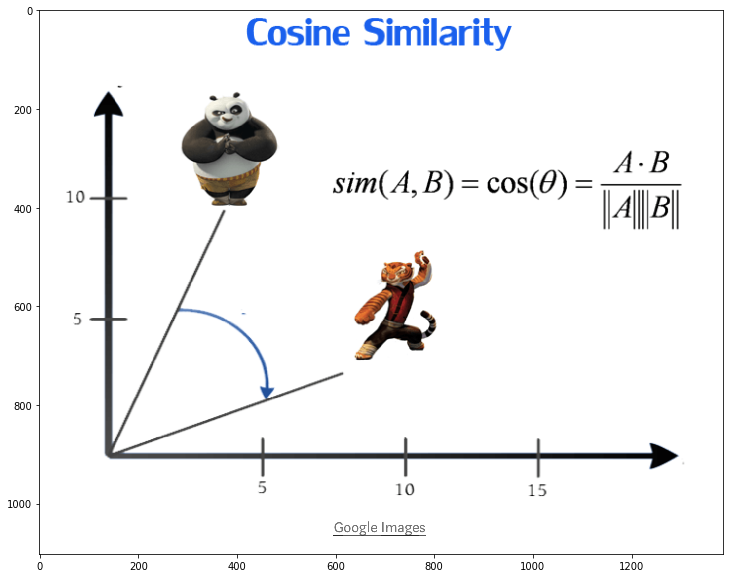

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("/Users/Ashrakat/Desktop/cosines1.png")
plt.imshow(image)
plt.gcf().set_size_inches(15, 10)
plt.show()

Google Images used by Dhruvil Karani in his Medium article

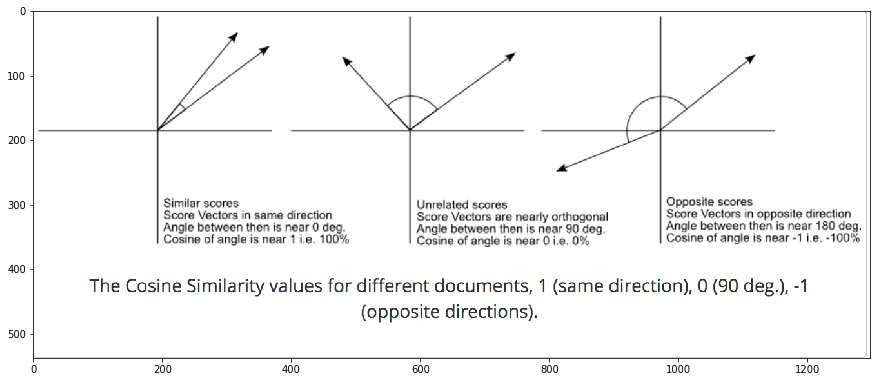

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("/Users/Ashrakat/Desktop/cosines.png")
plt.imshow(image)
plt.gcf().set_size_inches(15, 10)
plt.show()

Source: http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/

In [28]:
def nlp_simple_pipeline(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    
    text = nltk.word_tokenize(text)
        
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    text = [token for token in text if token not in stop_word_list]

    return text


def article_embedding(cleaned_article):
    
    article_embedd = []
    # for each word in the article, you take the embeddings
    for word in cleaned_article:
        try:
            embed_word = small_model[word]
            article_embedd.append(embed_word)
        except KeyError as e:
            print (e,word)
            continue
    
    # average vectors of all words
    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    avg = np.array(avg).reshape(1, -1)
    return avg

In [29]:
Document_A="The sun is shining today I want to go out"
Document_B= "What a beautiful summer day."
Document_C= "The winter is coming"
Document_D= "It is snowing over here"


In [30]:
from sklearn.metrics.pairwise import cosine_similarity

doc_a=nlp_simple_pipeline(Document_A)
doc_b=nlp_simple_pipeline(Document_B)
doc_c=nlp_simple_pipeline(Document_C)
doc_d=nlp_simple_pipeline(Document_D)

doc_a=article_embedding(doc_a)
doc_b=article_embedding(doc_b)
doc_c=article_embedding(doc_c)
doc_d=article_embedding(doc_d)




In [31]:
print("compare a and b",cosine_similarity(doc_a, doc_b))
print("compare a and c",cosine_similarity(doc_a, doc_c))
print("compare c and d",cosine_similarity(doc_c, doc_d))


compare a and b [[0.78690968]]
compare a and c [[0.74938256]]
compare c and d [[0.07962729]]


In [43]:
#define that you need to exclude punctuation
exclude = set(string.punctuation)

# this represent any text as a single "doc-embedding" we use it both for the query and the sentences
# input should be a string
def text_embedding(text):
    
    #this works to lower text
    text = text.lower()
    
    # we tokenize the text in single words
    text = nltk.tokenize.WordPunctTokenizer().tokenize(text)
    
    # we remove numbers and punctuation
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    doc_embed = []
    
    # for each word we get the embedding and we append it to a list
    for word in text:
            try:
                embed_word = small_model[word]
                doc_embed.append(embed_word)
            except KeyError as e: # if there is an error we continue
                print (e,word)
                continue
    # we average the embeddings of all the words, getting an overall doc embedding
    if len(doc_embed)>0:
        avg = [float(sum(col))/len(col) for col in zip(*doc_embed)]

        avg = np.array(avg).reshape(1, -1)

        # the output is a doc-embedding
        return avg
    else:
        return "Empty"

In [39]:
text_query = ["crime","criminal","murder","drugs","rape"]

#query = [" ".join(nlp_pipeline(" ".join(text_query)))]

emb_query = nlp_simple_pipeline(" ".join(text_query))
emb_query = article_embedding(" ".join(text_query))

emb_query

"word ' ' not in vocabulary"  
"word ' ' not in vocabulary"  
"word ' ' not in vocabulary"  
"word ' ' not in vocabulary"  


array([[-0.13253536,  0.819145  ,  0.76547932,  0.70347499,  0.2912375 ,
         0.16579393,  0.36828858, -0.769225  , -0.28019764, -0.11978679,
        -0.50301905,  0.19280669, -0.42859607, -0.49375818, -0.10584513,
        -0.12103418, -0.08089643,  0.12050568, -0.32359508, -0.46027108,
        -0.54381736, -0.18445364,  0.80415331,  0.40156007, -0.07995668,
        -0.79842786, -0.18229465, -0.05722968, -0.0466216 , -0.15972701,
         2.52249643, -0.25806499, -0.38123572,  0.46850433,  0.35544526,
        -0.94628071,  0.57264211, -0.28408821,  0.34345668,  0.07023029,
         0.59537169,  0.24779994, -0.31382025,  0.1091565 , -0.22633141,
         0.46183557,  0.230408  , -0.38011289,  0.00581271,  1.22701359]])

In [40]:
import csv

tsv_file = open("/Users/Ashrakat/Desktop/rt_dataset.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")
all_lines=[]
for line in read_tsv:
    print(line)
    all_lines.append(line)
tsv_file.close()

['date ', 'title ', 'topic ', 'content']
['16 Sep, 2016 14:08 ', 'Putin: We don’t approve of WADA hackers, but information they leaked raises questions', 'news', 'We don’t approve of what hackers do, but what they’ve done is definitely of interest to the international community, especially the sports community,” the Russian president said, as cited by RIA Novosti. “It raises a lot of questions. It turns out that healthy athletes legally take medications that are prohibited for others, and the people who obviously suffer from serious illnesses and severe disabilities are being banned from the Paralympics only on suspicion of using some kind of drugs,” he added. Earlier this week, hacktivists from the cyber group ‘Fancy Bears’ released files revealing that top world athletes had received the green light from WADA to take banned substances. Prominent US sports stars - including tennis players Serena and Venus Williams, multiple Olympic gymnastics champion Simone Biles, and basketball play

['25 Oct, 2016 17:24 ', 'German small arms ammo sales grow tenfold, total arms sales hit new record – report', 'news', 'The total value of the small arms ammo export contracts has risen from €27 million ($29.3 million) in the first half of 2015 to €283.8 million ($308 million) in the first six months of 2016, the reports says, adding that most ammunition supplies were intended for Germany’s NATO allies and “NATO equal” countries like Australia, New Zealand, Japan and Switzerland. Exports to these countries accounted for €275 million. However, at the national level, France, Poland, and Iraq are the top destinations for German small arms ammo. Iraq, where Germany supports Kurdish fighters in their battle against Islamic State (IS, former ISIS/ISIL), purchased small arms ammunition totalling €5.4 million. Meanwhile, exports of small arms decreased from €12.4 to 11.6 million as the government approved fewer sales to unstable regions. The situation still draws criticism from the opposition 

['7 May, 2016 17:10 ', "Scuffles, extra police deployed in Berlin as thousands rally for & against Merkel's policy (VIDEO)", 'news', 'Far-right groups have gathered in the center of Berlin near the governmental buildings to protest against Merkel\'s so-called “open door” policies toward migrants and refugees. The rally, held under the slogan "Merkel Must Go," gathered around 1,000 people by Saturday afternoon, TASS reported, citing police. "I am here for my family, for my culture, our identity, heritage and our future," one protester told RT, while another added that they are "not racists," but "patriots." "We are here to get back our rights. We are Europeans, if we give away our countries, where are we going to go?" a woman at the rally said. Signs reading "No Islam on German soil" could be seen at the march, with protesters carrying German flags and calling for the Chancellor to step down. They also demanded reintroduction of border controls in the EU. Ahead of the demonstration, som

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


['9 Sep, 2016 12:40 ', 'Serena Williams loses US Open semifinal & World No. 1 ranking', 'sport', 'The American star is chasing a landmark 23rd Grand Slam but will have to wait until next year to have another attempt at bettering her current 22 titles – a record she shares with Steffi Graf. Williams was outplayed by 10th seed Pliskova, with the big-serving 24-year-old victorious in straight sets, 6-2, 7-6. Serena Williams out of US Open with shock loss to Karolina Pliskova https://t.co/IFjaTfiTPt via @guardian_sport The 34-year-old double faulted when facing match point in the second set tiebreak, which was met with a muted response from the American audience and wild celebrations from the Eastern European. The defeat means that Williams has lost her world number one ranking, with Angelique Kerber taking over in top spot. The German will face Pliskova in Saturday’s final after overcoming Caroline Wozniacki in straight sets. It is the second consecutive year that Williams has crashed out

['28 Nov, 2016 14:56 ', "Italy's troubled Monte dei Paschi bank faces billions in legal claims", 'business', "The ailing bank has already set aside €627 million to cover claims. On Monday, the Italian market watchdog approved the bank’s capital raising plan. Monte dei Paschi was acknowledged as Europe's weakest major bank in July industry stress tests and wants to raise €5 billion through a debt swap and share sale. Survival plan: World's oldest bank to cut 2,600 jobs, close 500 branches, sell off bad loans & raise capital https://t.co/ETp7iKXWcP The European Central Bank has required a detailed funding plan from the lender for each year to 2018 after finding the bank’s liquidity position had weakened. Monte dei Paschi is on the point of collapse unless it receives state support. It has already been bailed out twice but is likely to need a third multi-billion euro cash injection from the government. However, EU regulations ban member states from using public money to support failed ban

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.



['17 Oct, 2016 15:55 ', 'Spy agencies illegally collected personal data on British citizens for 10 years, judges rule', 'uk', 'Responding to a complaint brought by Privacy International, the Investigatory Powers Tribunal (IPT) has ruled that the collection of bulk personal data – conducted by GCHQ, MI5 and MI6 between 1998 and 2015 – was unlawful. It ruled that surveillance of individuals’ phone and web use had been taking place without adequate safeguards or supervision for more than a decade. It also says some instances of data collection were in breach of Article 8 of the European Convention on Human Rights (ECHR), which ensures all citizens have the right to a private life and that any interference with personal data must be lawful and necessary. Its collection of ‘Bulk Communications Data’ (BCD) and ‘Bulk Personal Datasets’ (BPD) by the agencies “failed to comply” with ECHR protections until codes of practices were put in place in 2015, the tribunal added. BCD consists of the ‘wh

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [41]:
all_lines=all_lines[1:101]
len(all_lines)

100

In [46]:
all_lines

[['16 Sep, 2016 14:08 ',
  'Putin: We don’t approve of WADA hackers, but information they leaked raises questions',
  'news',
  'We don’t approve of what hackers do, but what they’ve done is definitely of interest to the international community, especially the sports community,” the Russian president said, as cited by RIA Novosti. “It raises a lot of questions. It turns out that healthy athletes legally take medications that are prohibited for others, and the people who obviously suffer from serious illnesses and severe disabilities are being banned from the Paralympics only on suspicion of using some kind of drugs,” he added. Earlier this week, hacktivists from the cyber group ‘Fancy Bears’ released files revealing that top world athletes had received the green light from WADA to take banned substances. Prominent US sports stars - including tennis players Serena and Venus Williams, multiple Olympic gymnastics champion Simone Biles, and basketball player Elena Delle Donne - were mentio

In [49]:
embs_corpus = [x+[text_embedding(x[3])] for x in all_lines] #what is x

"word 'feierstein' not in vocabulary" feierstein
"word 'planetponzi' not in vocabulary" planetponzi
"word 'maxkeiser' not in vocabulary" maxkeiser
"word 'gbtooz' not in vocabulary" gbtooz
"word 'rbdgncryff' not in vocabulary" rbdgncryff
"word 'sydneyairport' not in vocabulary" sydneyairport
"word 'gbtoozpic' not in vocabulary" gbtoozpic
"word 'tdjecdbcju' not in vocabulary" tdjecdbcju
"word 'gbtoozpic' not in vocabulary" gbtoozpic
"word 'gbtooz' not in vocabulary" gbtooz
"word 'happynewyear' not in vocabulary" happynewyear
"word 'bardack' not in vocabulary" bardack
"word 'bardack' not in vocabulary" bardack
"word 'qlolbhjdzy' not in vocabulary" qlolbhjdzy
"word 'bardack' not in vocabulary" bardack
"word 'cappaqua' not in vocabulary" cappaqua
"word 'hillaryclinton' not in vocabulary" hillaryclinton
"word 'видео' not in vocabulary" видео
"word 'опубликовано' not in vocabulary" опубликовано
"word 'сен' not in vocabulary" сен
"word 'hackinghillary' not in vocabulary" hackinghillary
"word '

"word 'idomeni' not in vocabulary" idomeni
"word 'kyritsis' not in vocabulary" kyritsis
"word 'idomeni' not in vocabulary" idomeni
"word 'idomeni' not in vocabulary" idomeni
"word 'idomeni' not in vocabulary" idomeni
"word 'kyritsis' not in vocabulary" kyritsis
"word 'idomeni' not in vocabulary" idomeni
"word 'kyritsis' not in vocabulary" kyritsis
"word 'idomeni' not in vocabulary" idomeni
"word 'idomeni' not in vocabulary" idomeni
"word 'idomeni' not in vocabulary" idomeni
"word 'idomeni' not in vocabulary" idomeni
"word 'kouroumplis' not in vocabulary" kouroumplis
"word 'idomeni' not in vocabulary" idomeni
"word 'pikeys' not in vocabulary" pikeys
"word 'mufc' not in vocabulary" mufc
"word 'ruptly' not in vocabulary" ruptly
"word 'ruptly' not in vocabulary" ruptly
"word 'yaondwyqmg' not in vocabulary" yaondwyqmg
"word 'fraisl' not in vocabulary" fraisl
"word 'chandelaas' not in vocabulary" chandelaas
"word 'rashkin' not in vocabulary" rashkin
"word 'rashkin' not in vocabulary" rashkin

"word 'skythan' not in vocabulary" skythan
"word 'meathstrong' not in vocabulary" meathstrong
"word 'jailthey' not in vocabulary" jailthey
"word 'jailthey' not in vocabulary" jailthey
"word 'morningand' not in vocabulary" morningand
"word 'rtearchives' not in vocabulary" rtearchives
"word 'onthisday' not in vocabulary" onthisday
"word 'vwnmupojmn' not in vocabulary" vwnmupojmn
"word 'ddoprpxdmf' not in vocabulary" ddoprpxdmf
"word 'patsymcgarryit' not in vocabulary" patsymcgarryit
"word 'nuratova' not in vocabulary" nuratova
"word 'nuratova' not in vocabulary" nuratova
"word 'rcyykxvcvz' not in vocabulary" rcyykxvcvz
"word 'montpellierhttps' not in vocabulary" montpellierhttps
"word 'aunès' not in vocabulary" aunès
"word 'percuté' not in vocabulary" percuté
"word 'accidentpic' not in vocabulary" accidentpic
"word 'afpxavkplp' not in vocabulary" afpxavkplp
"word 'énorme' not in vocabulary" énorme
"word 'énorme' not in vocabulary" énorme
"word 'accidentssncfpic' not in vocabulary" accide

In [50]:
embs_corpus

[['16 Sep, 2016 14:08 ',
  'Putin: We don’t approve of WADA hackers, but information they leaked raises questions',
  'news',
  'We don’t approve of what hackers do, but what they’ve done is definitely of interest to the international community, especially the sports community,” the Russian president said, as cited by RIA Novosti. “It raises a lot of questions. It turns out that healthy athletes legally take medications that are prohibited for others, and the people who obviously suffer from serious illnesses and severe disabilities are being banned from the Paralympics only on suspicion of using some kind of drugs,” he added. Earlier this week, hacktivists from the cyber group ‘Fancy Bears’ released files revealing that top world athletes had received the green light from WADA to take banned substances. Prominent US sports stars - including tennis players Serena and Venus Williams, multiple Olympic gymnastics champion Simone Biles, and basketball player Elena Delle Donne - were mentio

In [51]:
import codecs, nltk, string, os, gensim
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

scores = [x + [cosine_similarity(x[4], emb_query)[0]] for x in embs_corpus]
scores

[['16 Sep, 2016 14:08 ',
  'Putin: We don’t approve of WADA hackers, but information they leaked raises questions',
  'news',
  'We don’t approve of what hackers do, but what they’ve done is definitely of interest to the international community, especially the sports community,” the Russian president said, as cited by RIA Novosti. “It raises a lot of questions. It turns out that healthy athletes legally take medications that are prohibited for others, and the people who obviously suffer from serious illnesses and severe disabilities are being banned from the Paralympics only on suspicion of using some kind of drugs,” he added. Earlier this week, hacktivists from the cyber group ‘Fancy Bears’ released files revealing that top world athletes had received the green light from WADA to take banned substances. Prominent US sports stars - including tennis players Serena and Venus Williams, multiple Olympic gymnastics champion Simone Biles, and basketball player Elena Delle Donne - were mentio

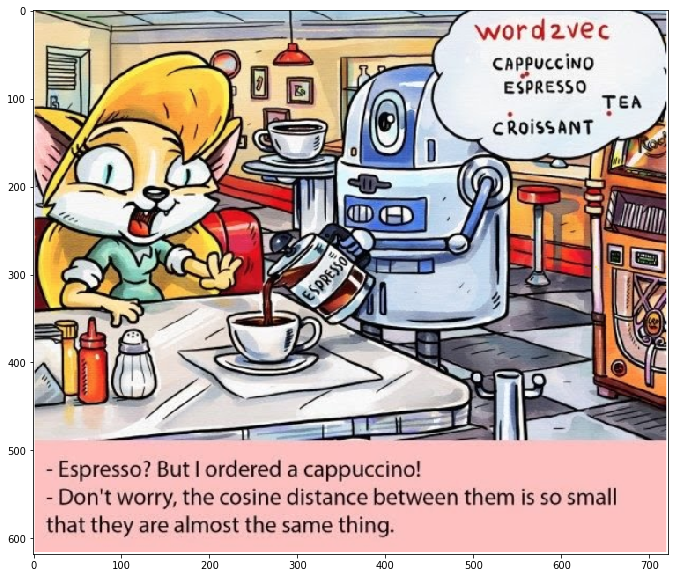

In [52]:
#inspired by fede
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("/Users/Ashrakat/Desktop/screen.png")
plt.imshow(image)
plt.gcf().set_size_inches(15, 10)
plt.show()


# Excercises:

**Excercise 1**

Using Pandas and sascat_excerpts


- Use the word embeddings on your content column --> create a new column that reflects the content with the word embeddings

**Excercise 2**

Use the rt_dataset.tsv

a)
- use single function that takes a law/document (one row), cleans the article and creates the article-embeddings
- you can only consider the first 100 articles for speed

b)
- create a dictionary of article embeddings [key number of article: value is the embeeding] (of course here you do that for the content)
- bonus: only if you can: the dictionary should be nested. a dictionary within a dictionary. so that item 0/dictionary 0 will have a dictionary that has the embedding and the title of the artcile. for example they keys can be embed: value the embeedings etc. if you cant do this step its okay you can follow with the rest
- extract the embedding of article 4
- calculate the cosine similarity between that article (article 4) and all the values in your dictionary - save them in a list of list of lists [if you have created the title include it in this list]
- sort your values 